In [1]:
import helper as h
h.responsellm("Bạn là mô hình nào ")


c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


helper


Tôi là một mô hình ngôn ngữ lớn, được đào tạo bởi Google.


In [5]:
import os

pathData = 'D:\\Learn\\Binh\\MSE\\HomeWork\\Python\\Buoi2\\OnClass\\B\\BigMartSales Prediction\\'
checkDir = os.path.isdir(pathData)
checkFileTest = os.path.isfile(pathData + 'Test.csv')
checkFileTrain = os.path.isfile(pathData + 'Train.csv')

print('The path and file are valid or not:',
      checkDir, checkFileTest, checkFileTrain)


The path and file are valid or not: True True True


In [ ]:
import pandas as pd

train = pd.read_csv(pathData + 'Train.csv')
test = pd.read_csv(pathData + 'Test.csv')

print('Shape of Train:', train.shape, 'Rows:',
      train.shape[0], 'Cols:', train.shape[1])

print('Shape of Test:', test.shape, 'Rows:',
      test.shape[0], 'Cols:', test.shape[1])


Shape of Train: (8523, 12) Rows: 8523 Cols: 12
Shape of Test: (5681, 11) Rows: 5681 Cols: 11


In [14]:

print(train.shape, test.shape)
print(train.index)
print(train.columns)


(8523, 12) (5681, 11)
RangeIndex(start=0, stop=8523, step=1)
Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')


In [20]:
import numpy as np

display(train.head(5))
print(np.unique(train["Item_Fat_Content"]))
print(np.unique(train["Item_Type"]))
print(train["Outlet_Size"].unique())
print(np.unique(train["Outlet_Location_Type"]))
print(np.unique(train["Outlet_Type"]))


Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

['LF' 'Low Fat' 'Regular' 'low fat' 'reg']
['Baking Goods' 'Breads' 'Breakfast' 'Canned' 'Dairy' 'Frozen Foods'
 'Fruits and Vegetables' 'Hard Drinks' 'Health and Hygiene' 'Household'
 'Meat' 'Others' 'Seafood' 'Snack Foods' 'Soft Drinks' 'Starchy Foods']
['Medium' nan 'High' 'Small']
['Tier 1' 'Tier 2' 'Tier 3']
['Grocery Store' 'Supermarket Type1' 'Supermarket Type2'
 'Supermarket Type3']


In [24]:
s = train['Item_Fat_Content'].value_counts()
StatsDF = pd.DataFrame({'Item_Fat_Content': s.index, 'Frequency': s.values})
display(StatsDF)


Item_Fat_Content  Frequency
0          Low Fat       5089
1          Regular       2889
2               LF        316
3              reg        117
4          low fat        112

In [25]:
train.describe()


Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

In [26]:
train.describe(include=object)


Item_Identifier Item_Fat_Content              Item_Type  \
count             8523             8523                   8523   
unique            1559                5                     16   
top              FDW13          Low Fat  Fruits and Vegetables   
freq                10             5089                   1232   

       Outlet_Identifier Outlet_Size Outlet_Location_Type        Outlet_Type  
count               8523        6113                 8523               8523  
unique                10           3                    3                  4  
top               OUT027      Medium               Tier 3  Supermarket Type1  
freq                 935        2793                 3350               5577

In [27]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [28]:
test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [29]:
train.isnull().sum()


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [30]:
test.isnull().sum()


Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [31]:
train['Item_Weight'] = train['Item_Weight'].fillna(train['Item_Weight'].mean())
train['Outlet_Size'] = train['Outlet_Size'].fillna(
    train['Outlet_Size'].mode().iloc[0])
test['Item_Weight'] = test['Item_Weight'].fillna(test['Item_Weight'].mean())
test['Outlet_Size'] = test['Outlet_Size'].fillna(
    test['Outlet_Size'].mode().iloc[0])


In [32]:
print(train.isnull().sum())


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


In [33]:
print(test.isnull().sum())


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64


In [34]:
train.Item_Fat_Content.value_counts()


Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [35]:
test.Item_Fat_Content.value_counts()


Item_Fat_Content
Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: count, dtype: int64

In [36]:
train.Item_Fat_Content = train.Item_Fat_Content.str.replace(
    'low fat', 'Low Fat')
train.Item_Fat_Content = train.Item_Fat_Content.str.replace('LF', 'Low Fat')
train.Item_Fat_Content = train.Item_Fat_Content.str.replace('reg', 'Regular')

test.Item_Fat_Content = test.Item_Fat_Content.str.replace('low fat', 'Low Fat')
test.Item_Fat_Content = test.Item_Fat_Content.str.replace('LF', 'Low Fat')
test.Item_Fat_Content = test.Item_Fat_Content.str.replace('reg', 'Regular')


In [37]:
test.Item_Fat_Content.value_counts()
train.Item_Fat_Content.value_counts()


Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

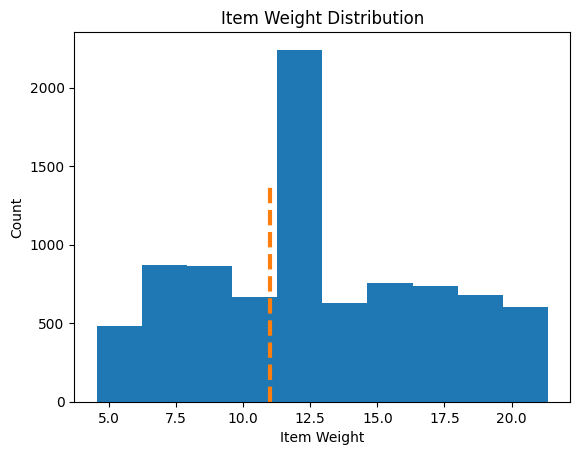

In [ ]:
import matplotlib.pyplot as plt

# print(train['Item_Weight'])

train['Item_Weight'].plot(kind='hist')
plt.plot([11, 11], [0, 1400], ls='--', lw=3)
plt.title('Item Weight Distribution')

plt.xlabel('Item Weight')

plt.ylabel('Count')
plt.show()


0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


C:\Users\Admin\AppData\Local\Temp\ipykernel_21884\1646688507.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train["Item_Outlet_Sales"], hist_kws=dict(


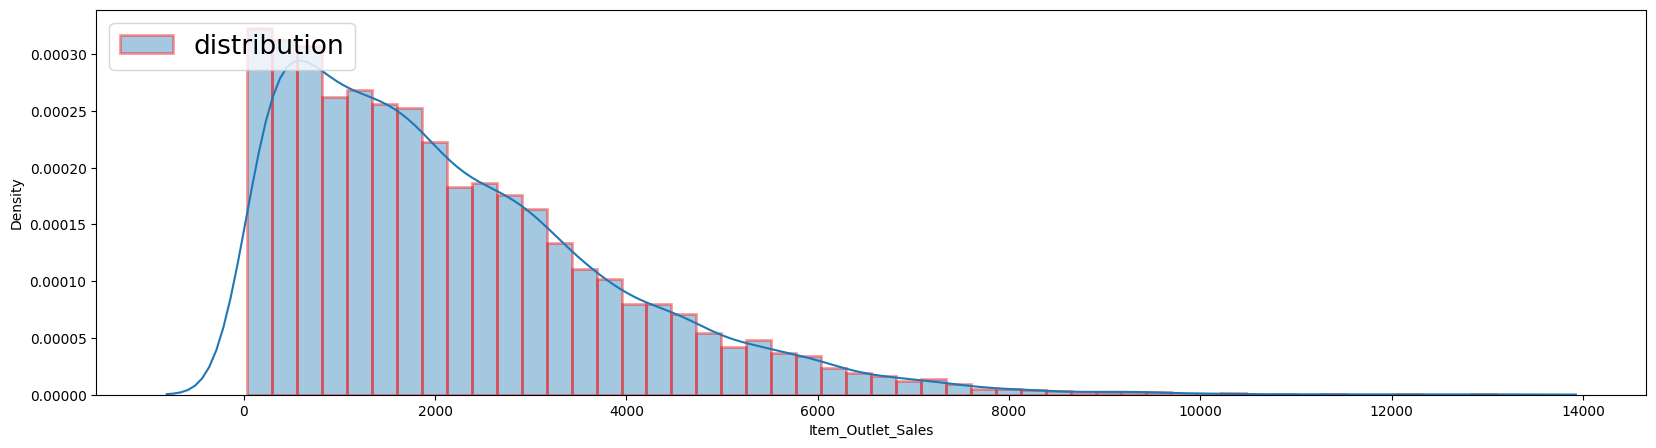

In [ ]:
import seaborn as sns
plt.figure(figsize=(20, 5))
print(train["Item_Outlet_Sales"])
# plt.plot(train["Index"],train["Item_Outlet_Sales"])
sns.distplot(train["Item_Outlet_Sales"], hist_kws=dict(
    edgecolor="red", linewidth=2, label='distribution'))
plt.legend(loc=2, fontsize=19)
plt.savefig("Fig.png", dpi=600)


<Axes: xlabel='Item_Type', ylabel='count'>

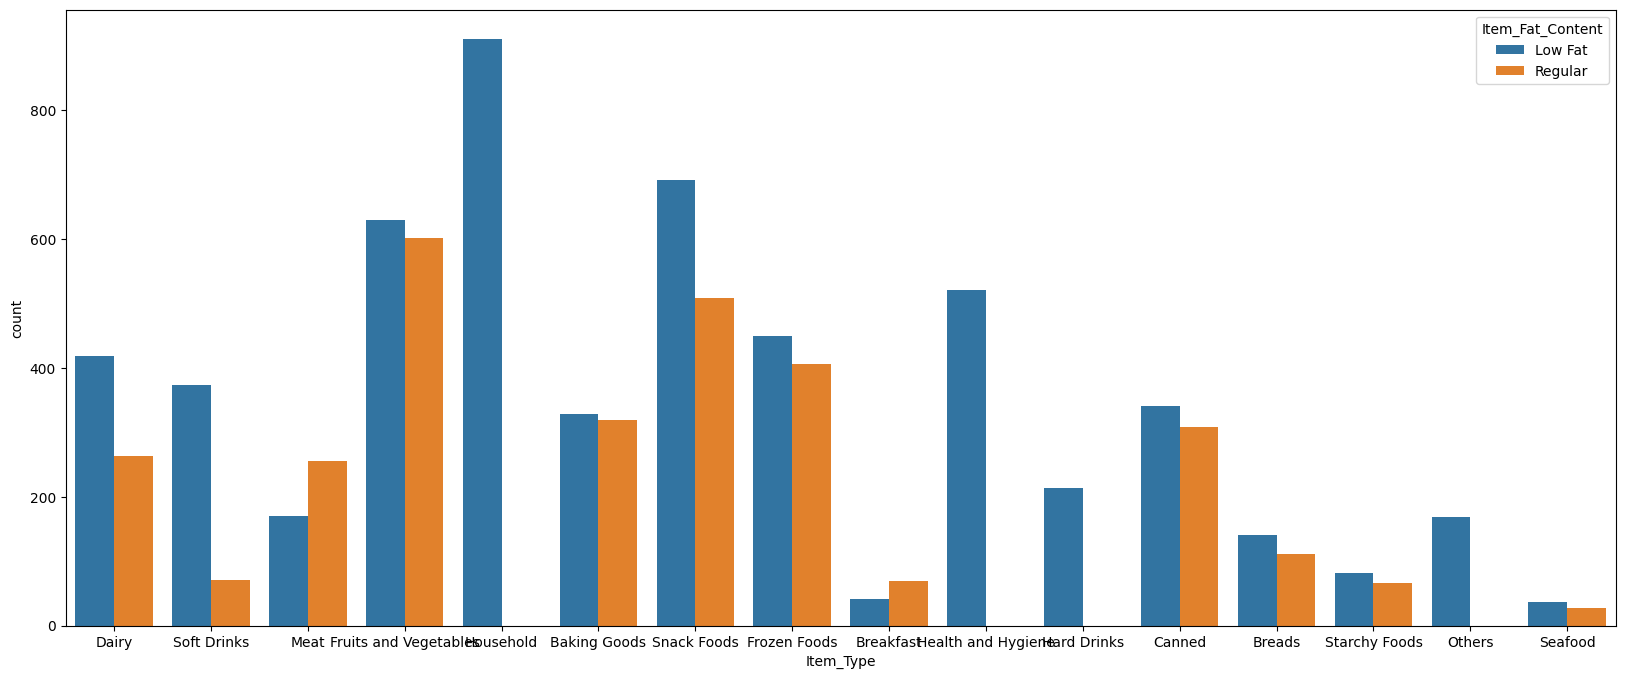

In [ ]:
import seaborn as sns
plt.figure(figsize=(20, 8))

sns.countplot(x="Item_Type", hue="Item_Fat_Content", data=train)


In [64]:
train.isna().sum()


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

<Axes: >

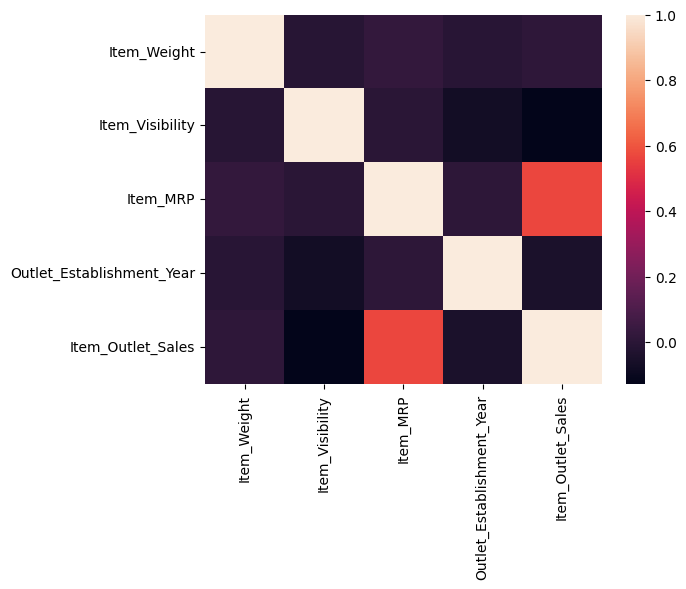

In [67]:
train = train.select_dtypes(include=[float, int])
sns.heatmap(train.corr())


In [68]:
test


Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDW58    20.750000          Low Fat         0.007565   
1              FDW14     8.300000          Regular         0.038428   
2              NCN55    14.600000          Low Fat         0.099575   
3              FDQ58     7.315000          Low Fat         0.015388   
4              FDY38    12.695633          Regular         0.118599   
...              ...          ...              ...              ...   
5676           FDB58    10.500000          Regular         0.013496   
5677           FDD47     7.600000          Regular         0.142991   
5678           NCO17    10.000000          Low Fat         0.073529   
5679           FDJ26    15.300000          Regular         0.000000   
5680           FDU37     9.500000          Regular         0.104720   

               Item_Type  Item_MRP Outlet_Identifier  \
0            Snack Foods  107.8622            OUT049   
1                  Dairy   87.3198            OUT017   
2                 Others  241.7538            OUT010   
3            Snack Foods  155.0340            OUT017   
4                  Dairy  234.2300            OUT027   
...                  ...       ...               ...   
5676         Snack Foods  141.3154            OUT046   
5677       Starchy Foods  169.1448            OUT018   
5678  Health and Hygiene  118.7440            OUT045   
5679              Canned  214.6218            OUT017   
5680              Canned   79.7960            OUT045   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                          1999      Medium               Tier 1   
1                          2007      Medium               Tier 2   
2                          1998      Medium               Tier 3   
3                          2007      Medium               Tier 2   
4                          1985      Medium               Tier 3   
...                         ...         ...                  ...   
5676                       1997       Small               Tier 1   
5677                       2009      Medium               Tier 3   
5678                       2002      Medium               Tier 2   
5679                       2007      Medium               Tier 2   
5680                       2002      Medium               Tier 2   

            Outlet_Type  
0     Supermarket Type1  
1     Supermarket Type1  
2         Grocery Store  
3     Supermarket Type1  
4     Supermarket Type3  
...                 ...  
5676  Supermarket Type1  
5677  Supermarket Type2  
5678  Supermarket Type1  
5679  Supermarket Type1  
5680  Supermarket Type1  

[5681 rows x 11 columns]

AttributeError: module 'helper' has no attribute 'responsellm'

In [69]:
x_train = train[["Item_Weight", "Item_Visibility", "Item_MRP"]]
y_train = train["Item_Outlet_Sales"]


In [70]:
display(x_train.head())
x_train.shape


Item_Weight  Item_Visibility  Item_MRP
0         9.30         0.016047  249.8092
1         5.92         0.019278   48.2692
2        17.50         0.016760  141.6180
3        19.20         0.000000  182.0950
4         8.93         0.000000   53.8614

(8523, 3)

In [72]:
y_train[:5]
y_train.shape


(8523,)

In [73]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=5)
neigh.fit(x_train, y_train)


KNeighborsRegressor()

In [77]:
y_pred = neigh.predict(x_train)
PredictDF = train.copy()
PredictDF["Item_Outlet_Sales_Predict"] = y_pred


In [80]:
display(PredictDF["Item_Outlet_Sales_Predict"].head())


0    4138.87912
1     755.54984
2    1512.96392
3    2895.43104
4     813.74076
Name: Item_Outlet_Sales_Predict, dtype: float64

In [81]:
train


Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0           9.300         0.016047  249.8092                       1999   
1           5.920         0.019278   48.2692                       2009   
2          17.500         0.016760  141.6180                       1999   
3          19.200         0.000000  182.0950                       1998   
4           8.930         0.000000   53.8614                       1987   
...           ...              ...       ...                        ...   
8518        6.865         0.056783  214.5218                       1987   
8519        8.380         0.046982  108.1570                       2002   
8520       10.600         0.035186   85.1224                       2004   
8521        7.210         0.145221  103.1332                       2009   
8522       14.800         0.044878   75.4670                       1997   

      Item_Outlet_Sales  
0             3735.1380  
1              443.4228  
2             2097.2700  
3              732.3800  
4              994.7052  
...                 ...  
8518          2778.3834  
8519           549.2850  
8520          1193.1136  
8521          1845.5976  
8522           765.6700  

[8523 rows x 5 columns]